In [158]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC

In [9]:
df = pd.read_csv('glass.csv')

In [10]:
df

RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]

<Axes: >

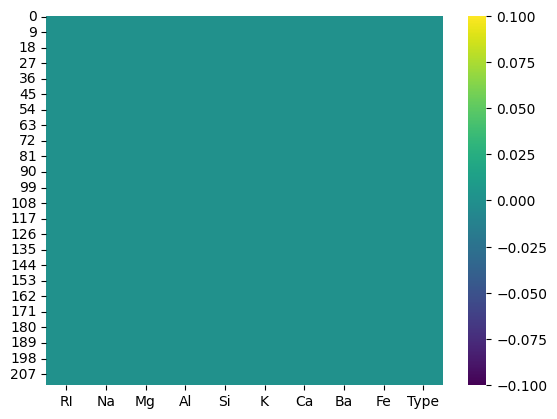

In [22]:
sns.heatmap(df.isnull(), cmap='viridis')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


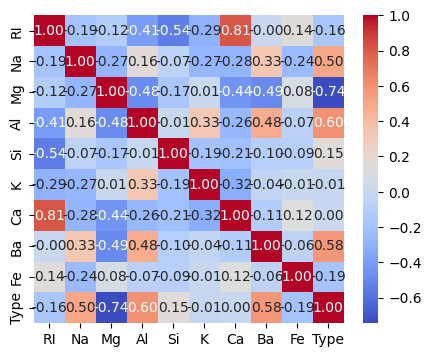

In [12]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(corr,  cmap='coolwarm', annot=True, fmt='.2f')
plt.show()

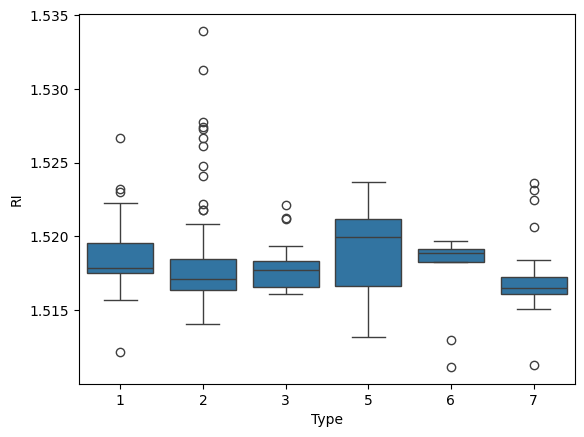

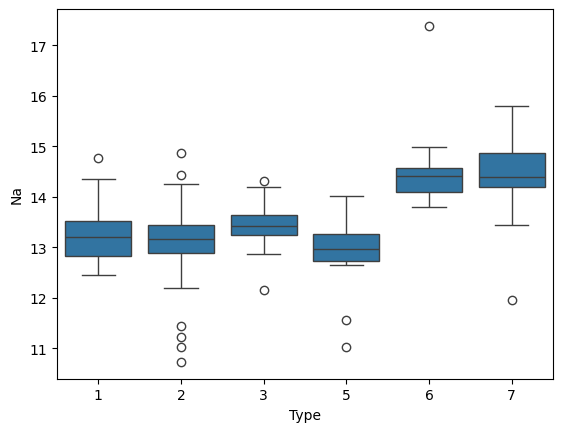

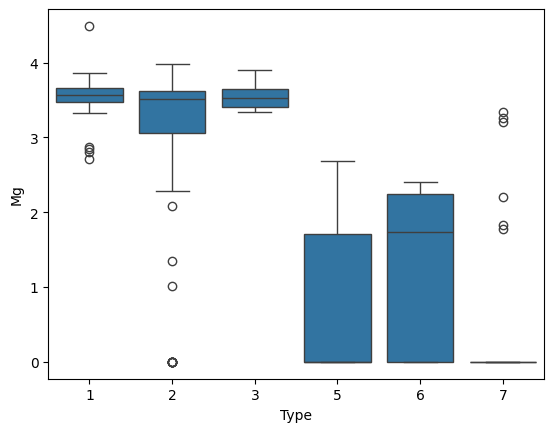

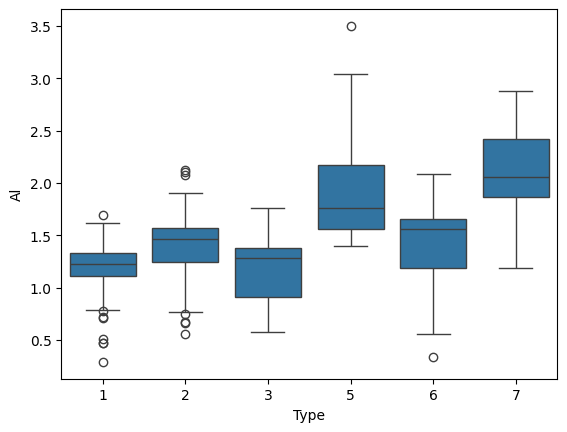

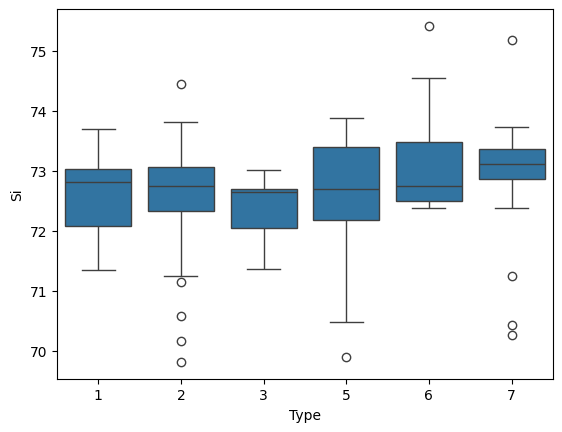

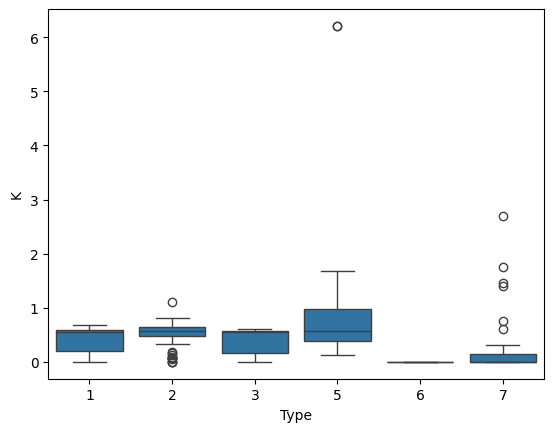

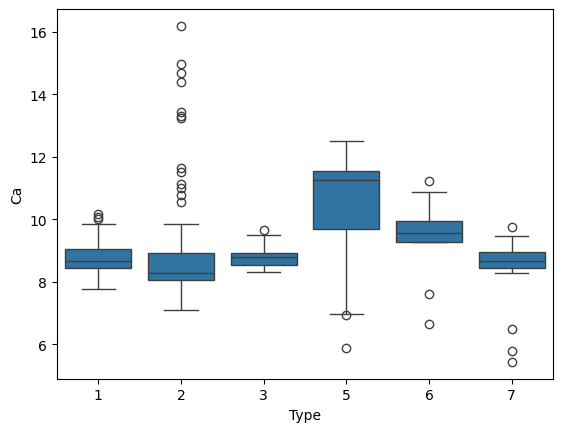

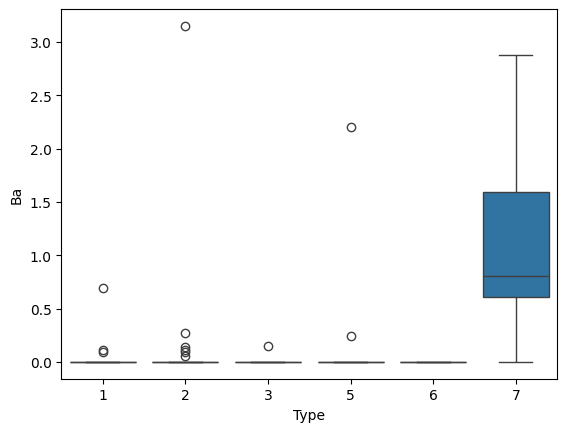

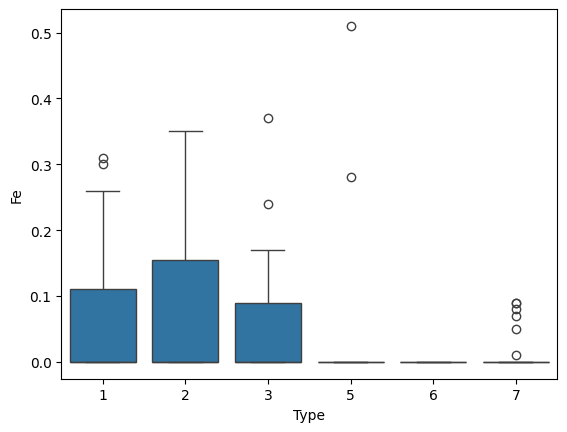

In [20]:
feature_name = ['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']
for i in range(len(feature_name)):
    figure = plt.figure()
    ax = sns.boxplot(x='Type', y=feature_name[i], data=df)

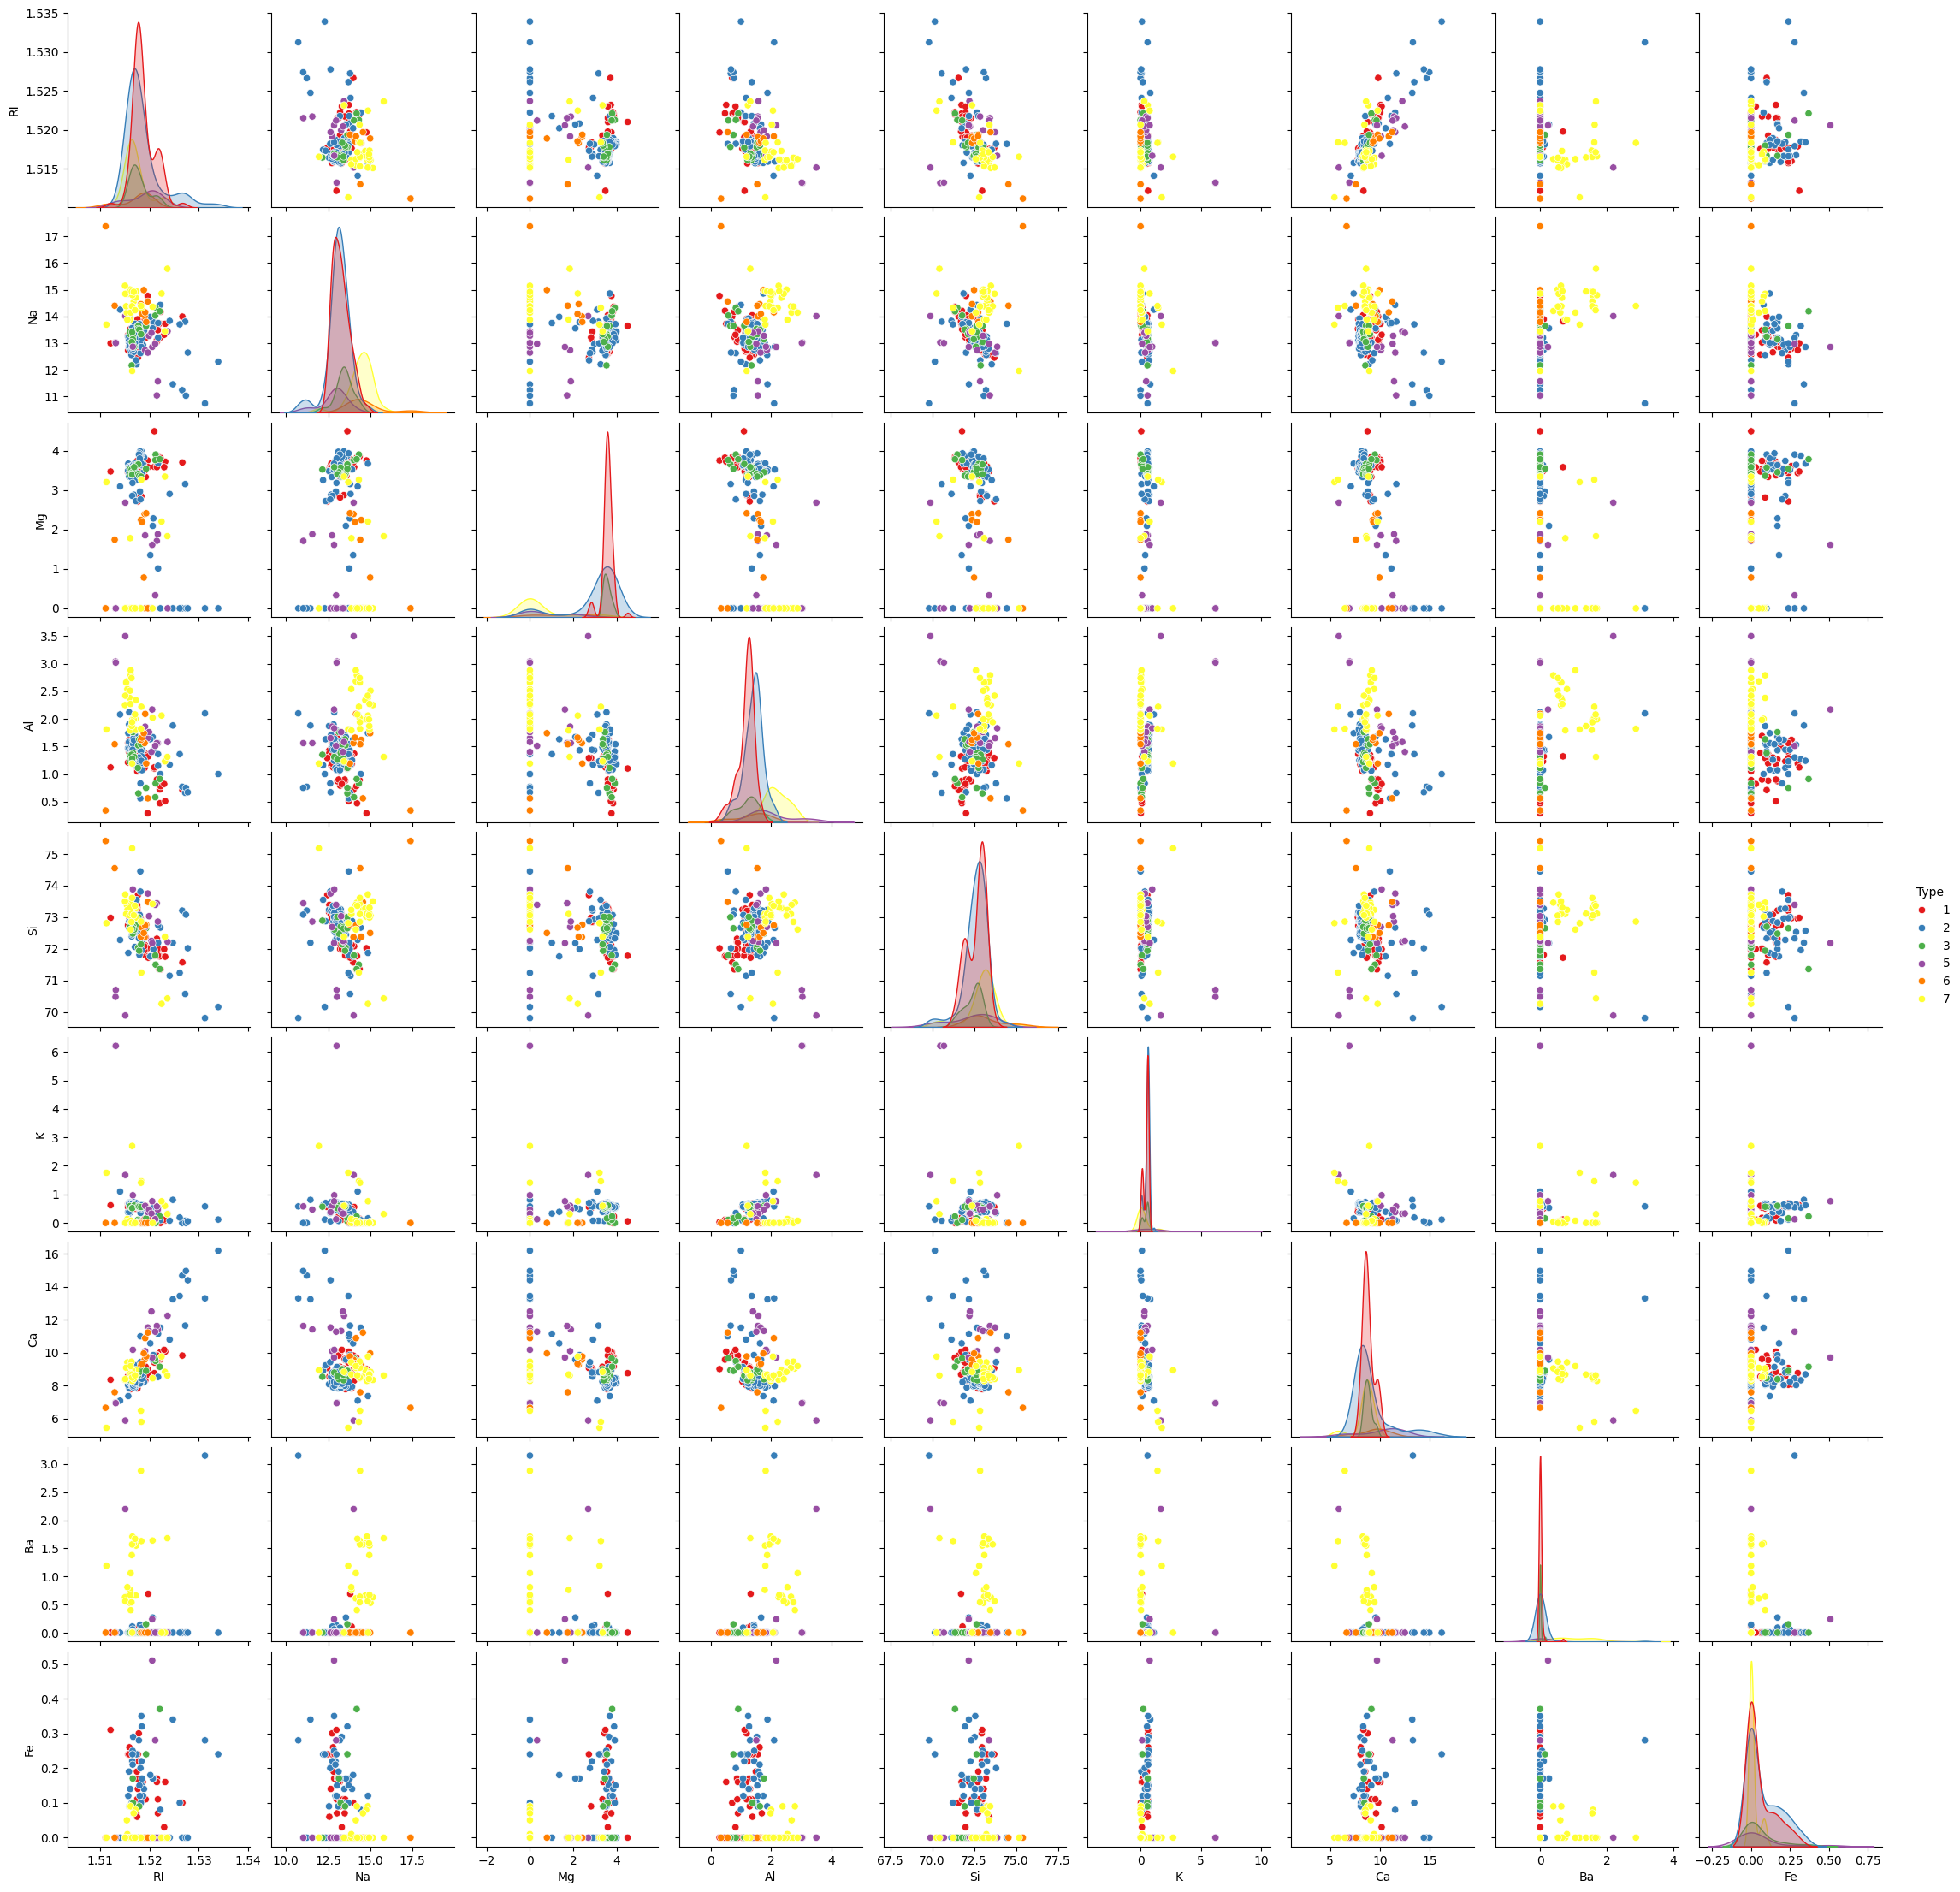

In [21]:
sns.pairplot(df, hue="Type", palette = 'Set1')

KNN

In [205]:
X = df.drop(['Type'], axis = 1)
y = df['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [206]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [207]:
scaled_X_train = scaler.transform(X_train) 
scaled_X_test = scaler.transform(X_test) 

y_train

In [208]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [209]:
pred = knn.predict(scaled_X_test)

In [210]:
print(confusion_matrix(y_test,pred))

[[13  1  0  0  0  0]
 [ 4 10  1  0  0  0]
 [ 1  0  2  0  0  0]
 [ 0  1  0  1  0  0]
 [ 0  1  0  0  1  0]
 [ 2  0  0  0  0  5]]


In [211]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.65      0.93      0.76        14
           2       0.77      0.67      0.71        15
           3       0.67      0.67      0.67         3
           5       1.00      0.50      0.67         2
           6       1.00      0.50      0.67         2
           7       1.00      0.71      0.83         7

    accuracy                           0.74        43
   macro avg       0.85      0.66      0.72        43
weighted avg       0.78      0.74      0.74        43



In [212]:
print(accuracy_score(y_test,pred))

0.7441860465116279


In [213]:
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_X_train,y_train)
    pred_i = knn.predict(scaled_X_test)
    error_rate.append(np.mean(pred_i != y_test))

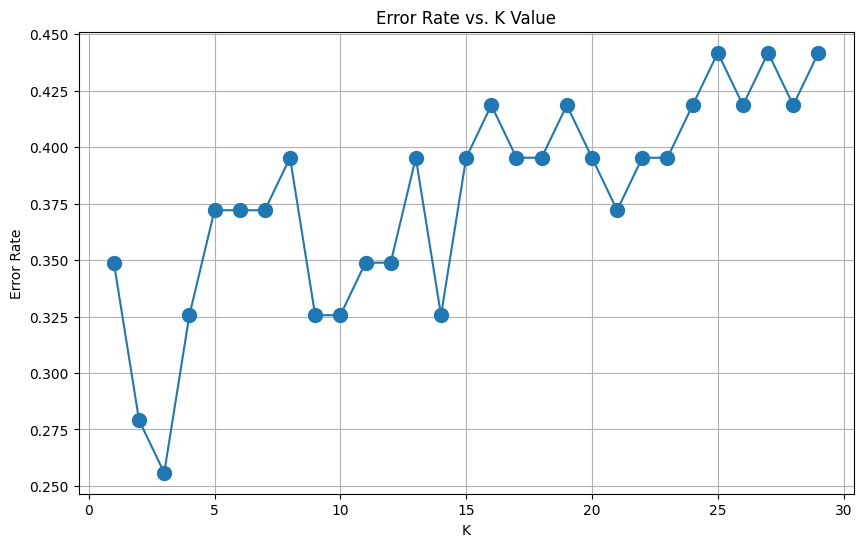

In [214]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate, marker='o', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

In [215]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(scaled_X_train,y_train)
pred = knn.predict(scaled_X_test)

print(confusion_matrix(y_test,pred))
print()
print(classification_report(y_test,pred))

[[13  1  0  0  0  0]
 [ 4 10  1  0  0  0]
 [ 1  0  2  0  0  0]
 [ 0  1  0  1  0  0]
 [ 0  1  0  0  1  0]
 [ 2  0  0  0  0  5]]

              precision    recall  f1-score   support

           1       0.65      0.93      0.76        14
           2       0.77      0.67      0.71        15
           3       0.67      0.67      0.67         3
           5       1.00      0.50      0.67         2
           6       1.00      0.50      0.67         2
           7       1.00      0.71      0.83         7

    accuracy                           0.74        43
   macro avg       0.85      0.66      0.72        43
weighted avg       0.78      0.74      0.74        43



print(accuracy_score(y_test,pred))

In [ ]:
Decision Tree

In [97]:
X = df.drop(['Type'], axis = 1)
y = df['Type']

In [98]:
set(y)

{1, 2, 3, 5, 6, 7}

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [100]:
print(type(X), type(y))
print(X_train.shape, y_train.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(171, 9) (171,)


In [101]:
model = DecisionTreeClassifier(criterion='gini')

In [102]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [103]:
y_pred = model.predict(X_test)

In [104]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.50      0.73      0.59        11
           2       0.64      0.47      0.54        15
           3       1.00      0.57      0.73         7
           5       0.60      1.00      0.75         3
           6       0.67      1.00      0.80         2
           7       1.00      0.80      0.89         5

    accuracy                           0.65        43
   macro avg       0.73      0.76      0.72        43
weighted avg       0.70      0.65      0.65        43



In [105]:
print(confusion_matrix(y_test, y_pred))

[[8 3 0 0 0 0]
 [5 7 0 2 1 0]
 [3 0 4 0 0 0]
 [0 0 0 3 0 0]
 [0 0 0 0 2 0]
 [0 1 0 0 0 4]]


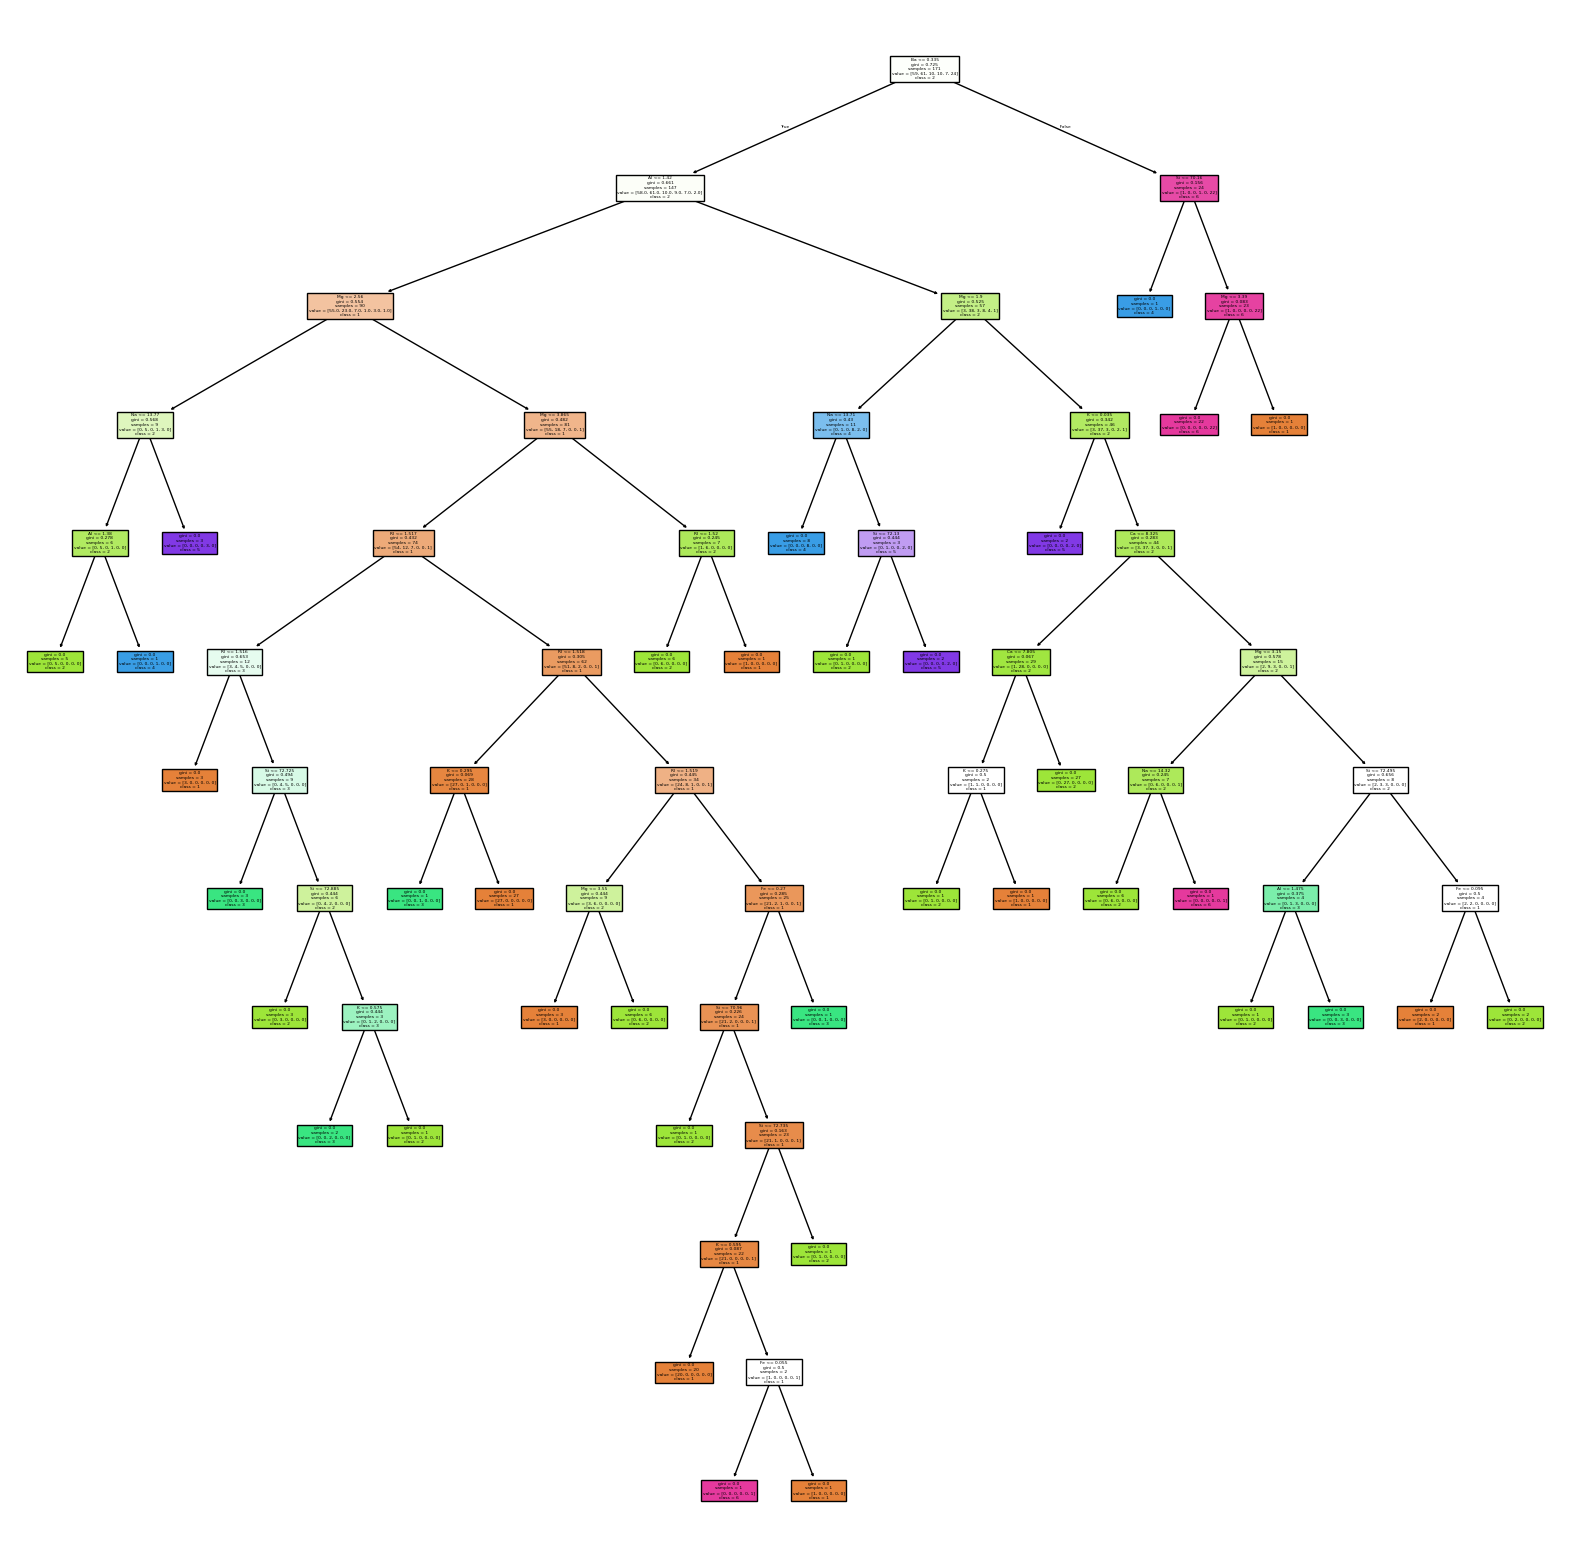

In [107]:
plt.figure(figsize = (20, 20))
plot_tree(model, feature_names=feature_name, 
          class_names = ['1', '2', '3','4','5','6','7'], filled = True)
plt.show()

SVM

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [232]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train) 
scaled_X_test = scaler.transform(X_test) 

In [233]:
model = SVC(C=1.0, gamma = 1.0, kernel = 'rbf')

In [234]:
model.fit(scaled_X_train,y_train)

SVC(gamma=1.0)

In [235]:
y_pred = model.predict(scaled_X_test)

In [236]:
print(confusion_matrix(y_test, y_pred))

[[20  7  0  0  0  0]
 [ 0 16  0  0  0  0]
 [ 4  5  0  0  0  0]
 [ 0  4  0  1  0  0]
 [ 0  3  0  0  1  0]
 [ 0  2  0  0  0  2]]


In [237]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.83      0.74      0.78        27
           2       0.43      1.00      0.60        16
           3       0.00      0.00      0.00         9
           5       1.00      0.20      0.33         5
           6       1.00      0.25      0.40         4
           7       1.00      0.50      0.67         4

    accuracy                           0.62        65
   macro avg       0.71      0.45      0.46        65
weighted avg       0.65      0.62      0.57        65



/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

Gridsearch

In [238]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 


In [239]:
grid = GridSearchCV(SVC(), param_grid, refit=True)

In [240]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [241]:
grid.best_params_

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

In [242]:
grid.best_estimator_

SVC(C=1000, gamma=0.01)

In [243]:
grid_predictions = grid.predict(scaled_X_test)

In [244]:
print(confusion_matrix(y_test,grid_predictions))

[[22  4  1  0  0  0]
 [ 3 12  1  0  0  0]
 [ 4  3  2  0  0  0]
 [ 0  1  0  4  0  0]
 [ 0  0  0  0  4  0]
 [ 1  0  0  1  0  2]]


In [245]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           1       0.73      0.81      0.77        27
           2       0.60      0.75      0.67        16
           3       0.50      0.22      0.31         9
           5       0.80      0.80      0.80         5
           6       1.00      1.00      1.00         4
           7       1.00      0.50      0.67         4

    accuracy                           0.71        65
   macro avg       0.77      0.68      0.70        65
weighted avg       0.71      0.71      0.69        65



Random Forest

In [246]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

In [247]:
model = RandomForestClassifier(n_estimators=50, random_state=13)

In [248]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=13)

In [249]:
y_pred = model.predict(X_test)

In [250]:
accuracy = accuracy_score(y_test, y_pred)

In [251]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.54      0.88      0.67        16
           2       0.77      0.65      0.71        26
           3       1.00      0.17      0.29         6
           5       0.75      1.00      0.86         3
           6       1.00      1.00      1.00         2
           7       1.00      0.83      0.91        12

    accuracy                           0.72        65
   macro avg       0.84      0.75      0.74        65
weighted avg       0.78      0.72      0.71        65



In [252]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[14  2  0  0  0  0]
 [ 8 17  0  1  0  0]
 [ 3  2  1  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  2  0]
 [ 1  1  0  0  0 10]]


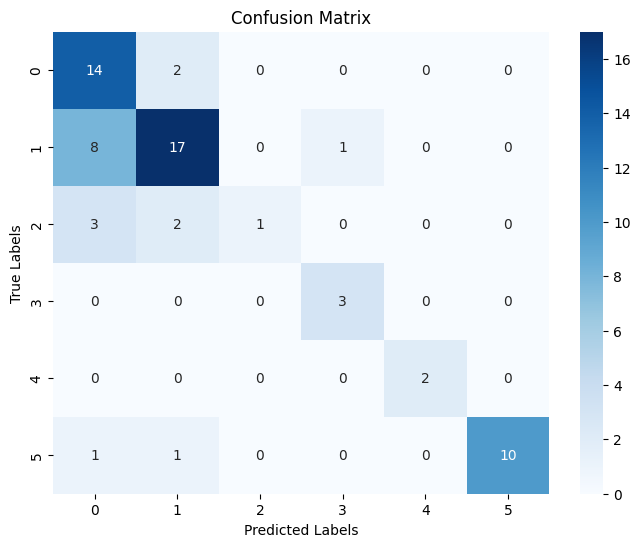

In [253]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

AdaBoost

In [257]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [268]:
base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42)
abc = AdaBoostClassifier(estimator=base_estimator, n_estimators=100,algorithm='SAMME')

In [269]:
abc.fit(X_train, y_train)

# Predict and evaluate
y_pred = abc.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.5384615384615384


In [266]:
print(confusion_matrix(y_test, y_pred))

[[12  1  5  1  0  0]
 [ 7  5  5  2  2  2]
 [ 1  0  3  0  0  0]
 [ 0  4  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0 10]]


In [267]:
print(classification_report(y_test, y_pred,zero_division=1))

              precision    recall  f1-score   support

           1       0.60      0.63      0.62        19
           2       0.50      0.22      0.30        23
           3       0.23      0.75      0.35         4
           5       0.40      0.33      0.36         6
           6       0.60      1.00      0.75         3
           7       0.83      1.00      0.91        10

    accuracy                           0.54        65
   macro avg       0.53      0.66      0.55        65
weighted avg       0.56      0.54      0.52        65

